## Sensibility (2 hours)

In [ ]:
import torch
torch.ones(1).to('cuda')

tensor([1.], device='cuda:0')

In [4]:
import pandas as pd, numpy as np
import pickle, seaborn as sns
from matplotlib import pyplot as plt


data = pickle.load(open('../tsnh/diferent_persona_vectorstrain.csv.pickle', 'rb'))

personas = ["You are an expert in social psychology. When you are asked a question, you prefer to give short, concrete answers.",
"You are an expert in social psychology.",
"",
"You are a Linguist.",
"You are a content moderator.",
"You are a psychologist.",
"You are a social media expert.",
"You are a political scientist.",
"You are a sociologist.",]

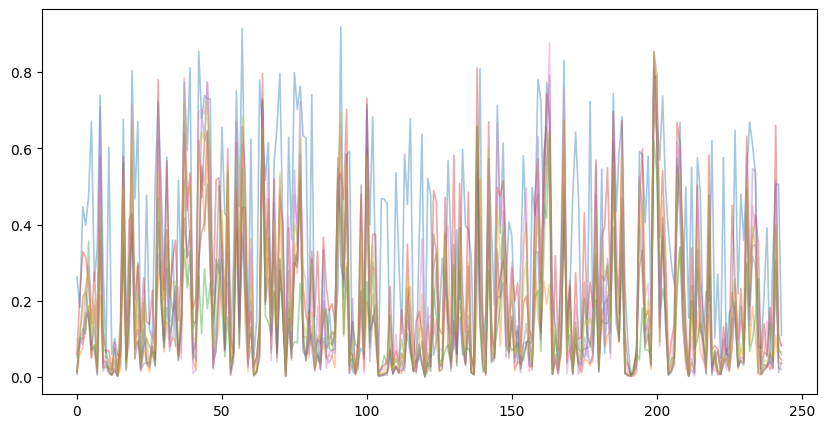

In [5]:
# Values for entry 0 in the training data fro all 9 prompts

plt.figure(figsize=(10,5))
for i in range(len(data)):
    plt.plot(range(len(data[i]['values'][0])), data[i]['values'][0], label= f'Pph {i+1}', alpha=0.4, linestyle='-', linewidth=1.2)

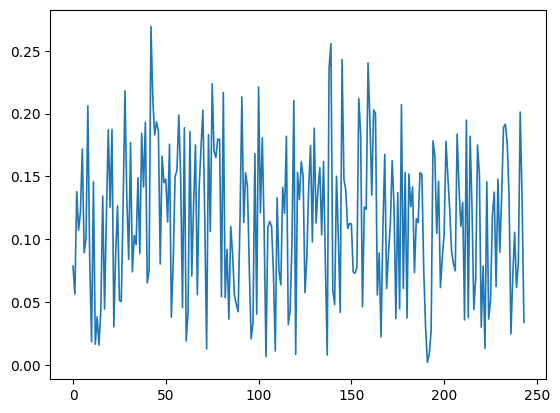

In [6]:
# for each feature in the entry 0, the mean difference between all pairs of personas
dif = []

for k in range(len(data[0]['values'][0])):
	dif.append([])
	for i in range(len(data)):
		for j in range(i+1, len(data)):
			dif[k].append(abs(data[i]['values'][0][k] - data[j]['values'][0][k]))

z = np.array(dif).mean(axis=-1)
plt.plot(range(len(z)), z, linestyle='-', linewidth=1.2)

In [7]:
values_per_instance = np.array([np.array(data[i]['values']) for i in range(len(data))])
# values_per_instance = values_per_instance[:, np.random.choice(values_per_instance.shape[1], 1000, replace=False)]

print(values_per_instance.shape)

(9, 13923, 244)


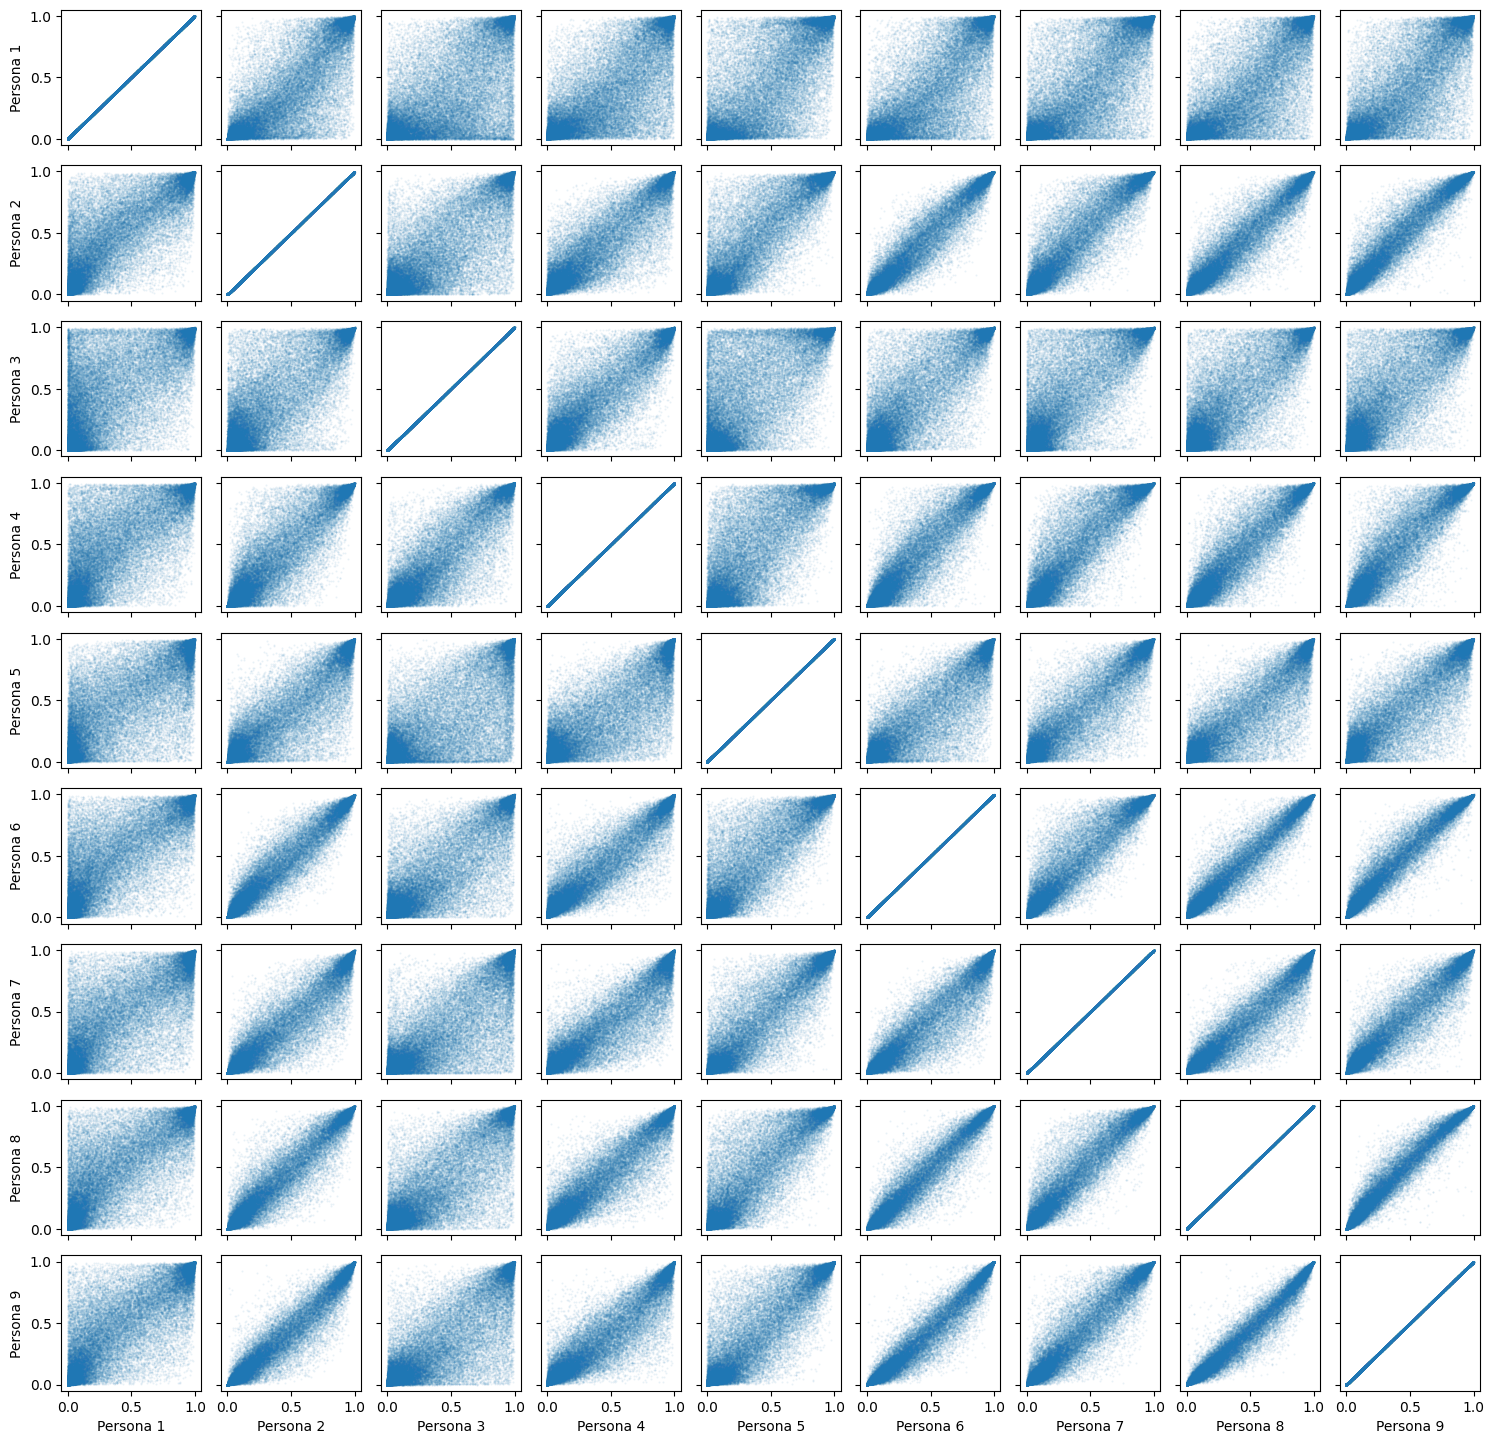

In [8]:
#scatter plot

## for each pair of personas plot a scatter using the sample tensor, len(sample) = len(personas)
nsample = values_per_instance[:, np.random.choice(values_per_instance.shape[1], 200, replace=False)]
nsample = nsample.reshape(nsample.shape[0], -1)

fig, axes = plt.subplots(len(personas), len(personas), figsize=(15, 15), 
                         	sharex=True, sharey=True, )
# fig.suptitle("Correlation in Values from different Personas", fontsize=16)

for i in range(len(personas)):
    for j in range(len(personas)):
        ax = axes[i, j]
        ax.scatter(nsample[i], nsample[j], alpha=0.1, 
                    linewidths=0.01, s=2)
        if i == len(personas) - 1:
            ax.set_xlabel(f"Persona {j+1}")
        if j == 0:
            ax.set_ylabel(f"Persona {i+1}")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


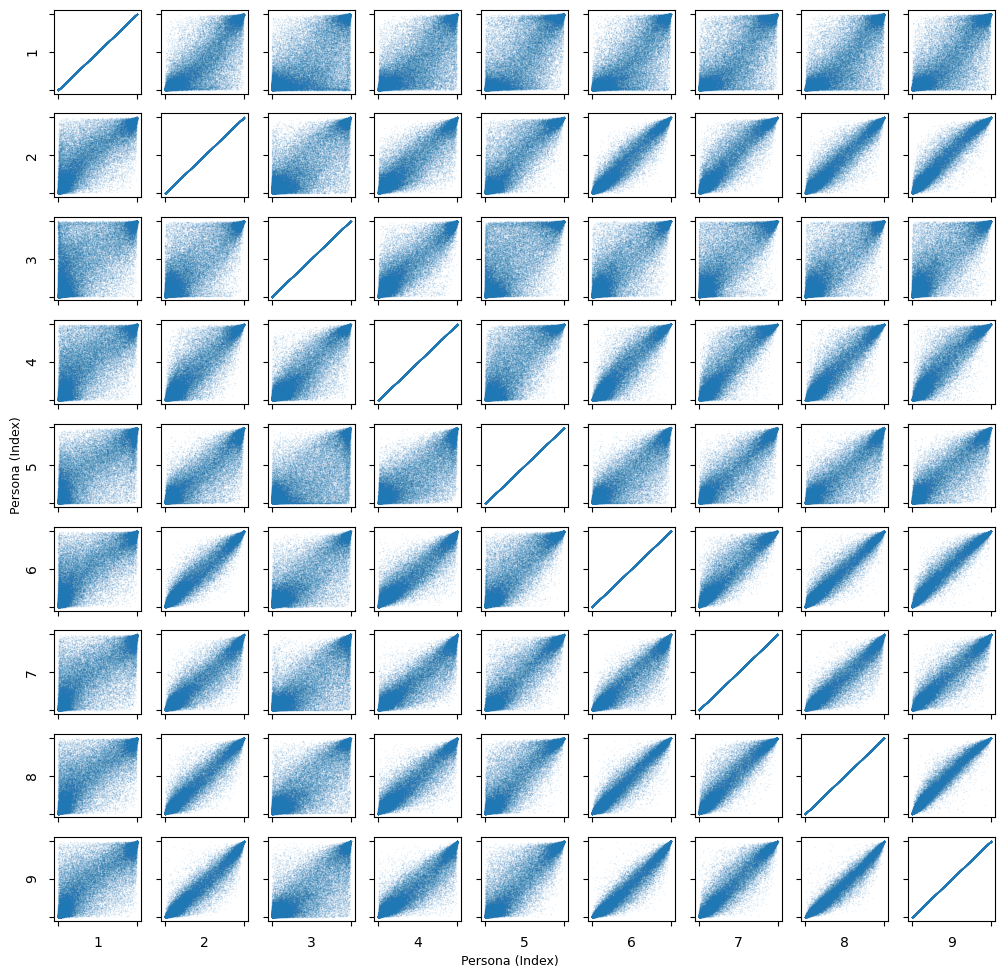

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(len(personas), len(personas), figsize=(10, 10), 
                          sharex=True, sharey=True)
# fig.suptitle("Correlation in Values from Different Personas", fontsize=16)

for i in range(len(personas)):
    for j in range(len(personas)):
        ax = axes[i, j]
        ax.scatter(nsample[i], nsample[j], alpha=0.1,
                    linewidths=0.001, s=1)
        
        # Set axis labels for only the outer plots
        if i == len(personas) - 1:
            ax.set_xlabel(f"{j+1}")  # Only the index for x-axis
        else:
            ax.set_xticklabels([])  # Remove inner x-tick labels
            
        if j == 0:
            ax.set_ylabel(f"{i+1}")  # Only the index for y-axis
        else:
            ax.set_yticklabels([])  # Remove inner y-tick labels

# Adding overarching labels for axes
fig.text(0.5, 0.00, 'Persona (Index)', ha='center', fontsize=9)
fig.text(-0.0, 0.5, 'Persona (Index)', va='center', rotation='vertical', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('scatter_corr_gemeval.eps', dpi=600)
plt.show()

In [29]:
personas

['You are an expert in social psychology. When you are asked a question, you prefer to give short, concrete answers.',
 'You are an expert in social psychology.',
 '',
 'You are a Linguist.',
 'You are a content moderator.',
 'You are a psychologist.',
 'You are a social media expert.',
 'You are a political scientist.',
 'You are a sociologist.']

## Standard deviation across personas

<Axes: ylabel='Density'>

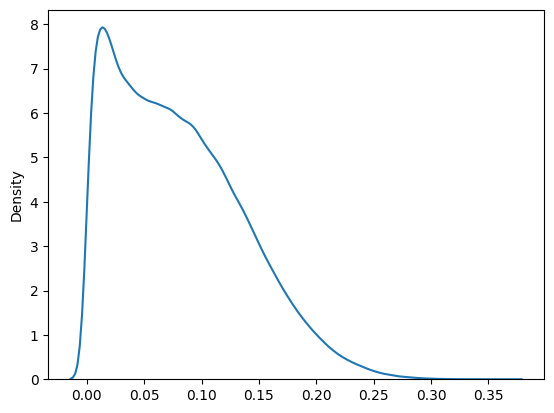

In [53]:
import seaborn as sns
sns.kdeplot(np.std(values_per_instance.reshape(len(personas), -1), axis=0))

## TSNH

In [18]:

import pandas as pd, numpy as np
import pickle, seaborn as sns
from matplotlib import pyplot as plt


data = pickle.load(open('../tsnh/diferent_persona_vectorstrain.csv.pickle', 'rb'))
values_per_instance = np.array([np.array(data[i]['values']) for i in range(len(data))])

print(values_per_instance.shape)

from itertools import combinations
# from scipy.stats import spearmanr
from scipy.stats import pearsonr
import seaborn as sns

sample = values_per_instance.reshape(len(personas), -1)
pairs = list(combinations(range(len(sample)), 2))
corr_values_tsnh = np.zeros((len(sample), len(sample)))
# Perform pairwise Spearman tests
ps = np.zeros((len(sample), len(sample)))
for i, j in pairs:
    corr, p = pearsonr(sample[i], sample[j])
    corr_values_tsnh[i][j] = corr
    ps[i][j] = p
    # print(f"Spearman correlation between LLM{i+1} and LLM{j+1}: {corr:.3f}, p-value: {p}")

(9, 13923, 244)


## Germeval

In [11]:

import pandas as pd, numpy as np
import pickle, seaborn as sns
from matplotlib import pyplot as plt

from itertools import combinations
from scipy.stats import pearsonr
import seaborn as sns

data = pickle.load(open('../germeval/diferent_persona_vectors_train.pickle', 'rb'))
values_per_instance = np.array([np.array(data[i]['values']) for i in range(len(data))])
print(values_per_instance.shape)


sample = values_per_instance.reshape(len(personas), -1)
pairs = list(combinations(range(len(sample)), 2))
corr_values_germ = np.zeros((len(sample), len(sample)))
# Perform pairwise Spearman tests
ps = np.zeros((len(sample), len(sample)))
for i, j in pairs:
    corr, p = pearsonr(sample[i], sample[j])
    corr_values_germ[i][j] = corr
    ps[i][j] = p
    # print(f"Spearman correlation between LLM{i+1} and LLM{j+1}: {corr:.3f}, p-value: {p}")

#save imge of the correlation matrix

# sns.heatmap(corr_values + np.identity(len(corr_values)), annot=True, cbar=False)
# # sns.heatmap(corr_values, annot=True)
# plt.savefig('correlation_matrix_tsnh.eps', dpi=600)

# print(ps.max(), ps.min())

(9, 5009, 244)


In [12]:
# corr_values_tsnh mean of the triangle superior

upper_triangle_indices = np.triu_indices_from(corr_values_germ, k=1)


# Extract the values of the superior triangle
superior_triangle_values = corr_values_germ[upper_triangle_indices]

# Compute the mean value of the superior triangle
np.mean(superior_triangle_values)


np.float64(0.9128527475334661)

In [13]:
import matplotlib.font_manager as fm
from matplotlib import rcParams

# Path to custom font file
font_path = './Times New Roman.ttf'  # Update with correct path
times_new_roman = fm.FontProperties(fname=font_path)

# Set font globally
rcParams['font.family'] =''
plt.rcParams.update({'font.size': 12})

/tmp/ipykernel_1475281/2639432421.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the color bar


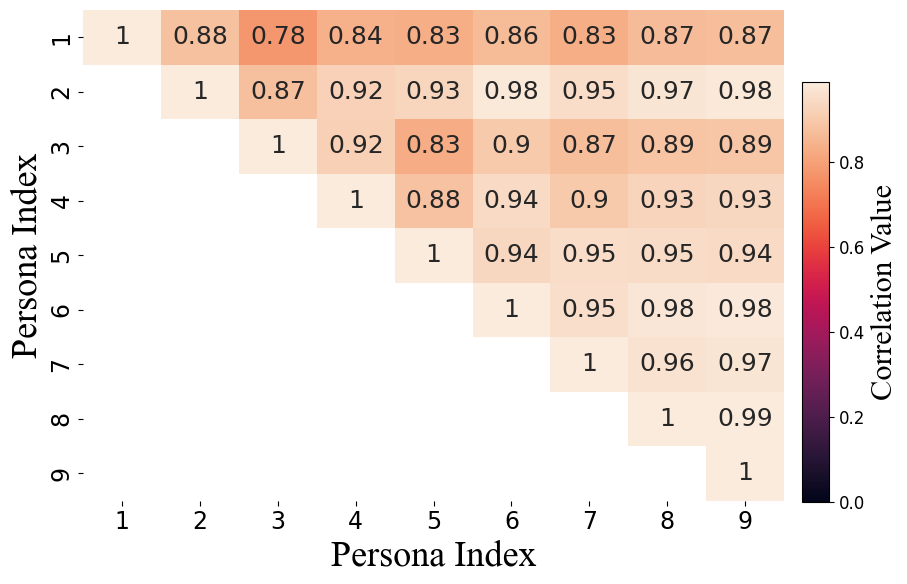

In [26]:
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mask the lower triangle
mask = np.triu(np.ones_like(corr_values_germ, dtype=bool))

# Determine global color limits
vmin = min(corr_values_germ.min(), corr_values_germ.min())
vmax = max(corr_values_germ.max(), corr_values_germ.max())

# Create subplots for the heatmaps
fig, axes = plt.subplots(1, 1, figsize=(9, 6))

# Heatmap for corr_values_germeval
sns.heatmap(
    corr_values_germ + np.eye(len(corr_values_germ)), 
    annot=True, 
    cbar=False, 
    ax=axes, 
    vmin=vmin, 
    vmax=vmax, 
    mask=~mask, 
    cmap='rocket',
    annot_kws={'fontsize': 18}
)

# Set axis labels
axes.set_xlabel('Persona Index', fontsize=26, fontproperties=times_new_roman)
axes.set_ylabel('Persona Index', fontsize=26, fontproperties=times_new_roman)

# Change tick labels to start from 1 instead of 0
axes.set_xticks(np.arange(len(corr_values_germ)) + 0.5)  # Center labels on ticks
axes.set_yticks(np.arange(len(corr_values_germ)) + 0.5)
axes.set_xticklabels(np.arange(1, len(corr_values_germ) + 1), fontsize=17)
axes.set_yticklabels(np.arange(1, len(corr_values_germ) + 1), fontsize=17)

axes.tick_params(axis='y', labelsize=17)
axes.tick_params(axis='x', labelsize=17)

# Create a single global color bar
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])  # Position: [left, bottom, width, height]
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='rocket')
fig.colorbar(sm, cax=cbar_ax)
cbar_ax.set_ylabel('Correlation Value', fontsize=22, fontproperties=times_new_roman)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the color bar
plt.savefig('correlation_matrix_germeval.eps', dpi=600, format='eps')
plt.show()

/tmp/ipykernel_2799973/1386710111.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the color bar


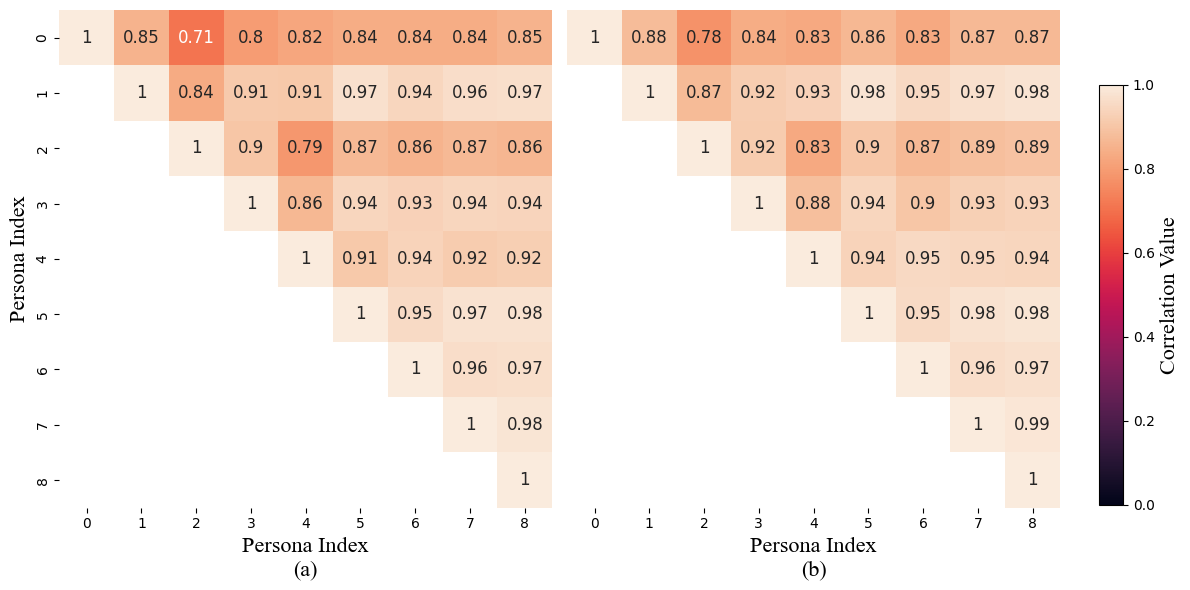

In [105]:
# Mask the lower triangle
from matplotlib import rcParams


mask = np.triu(np.ones_like(corr_values_tsnh, dtype=bool))

# Determine global color limits
vmin = min(corr_values_tsnh.min(), corr_values_germ.min())
vmax = max(corr_values_tsnh.max(), corr_values_germ.max())

# Create subplots for the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Heatmap for corr_values_tsnh
sns.heatmap(corr_values_tsnh, annot=True, cbar=False, 
            ax=axes[0], vmin=vmin, vmax=vmax, mask=~mask, cmap='rocket', 
    		annot_kws={'fontsize': 12})
# axes[0].set_title('Correlation Matrix - TSNH')
axes[0].set_ylabel('Persona Index', fontsize=16, fontproperties=times_new_roman)
axes[0].set_xlabel('Persona Index\n(a)', fontsize=16, fontproperties=times_new_roman)

# Heatmap for corr_values_germeval
sns.heatmap(corr_values_germ, annot=True, cbar=False, ax=axes[1], 
            vmin=vmin, vmax=vmax, mask=~mask, cmap='rocket',
			annot_kws={'fontsize': 12})
# axes[1].set_title('Correlation Matrix - Germeval', fontsize=12)
axes[1].set_xlabel('Persona Index\n(b)', fontsize=16, fontproperties=times_new_roman)
axes[1].set_ylabel('')  # Remove y-axis label
axes[1].tick_params(left=False)  # Remove y-axis ticks
axes[1].set_yticklabels([])

# Create a single global color bar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position: [left, bottom, width, height]
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='rocket')
fig.colorbar(sm, cax=cbar_ax)
cbar_ax.set_ylabel('Correlation Value', fontsize=16, fontproperties=times_new_roman)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the color bar
plt.savefig('correlation_matrices.eps', dpi=600, format='eps')
plt.show()

### Same experiment at the instance level

In [55]:
values_per_instance.shape

(9, 1000, 244)

In [56]:
corr_per_instance = np.zeros((len(personas), len(personas), len(values_per_instance[0])))
corr_per_instance.shape

for i in range(len(personas)):
	for j in range(len(personas)):
		for k in range(len(values_per_instance[0])):
			corr, _ = pearsonr(values_per_instance[i,k,:], values_per_instance[j,k,:])
			corr_per_instance[i][j][k] = corr

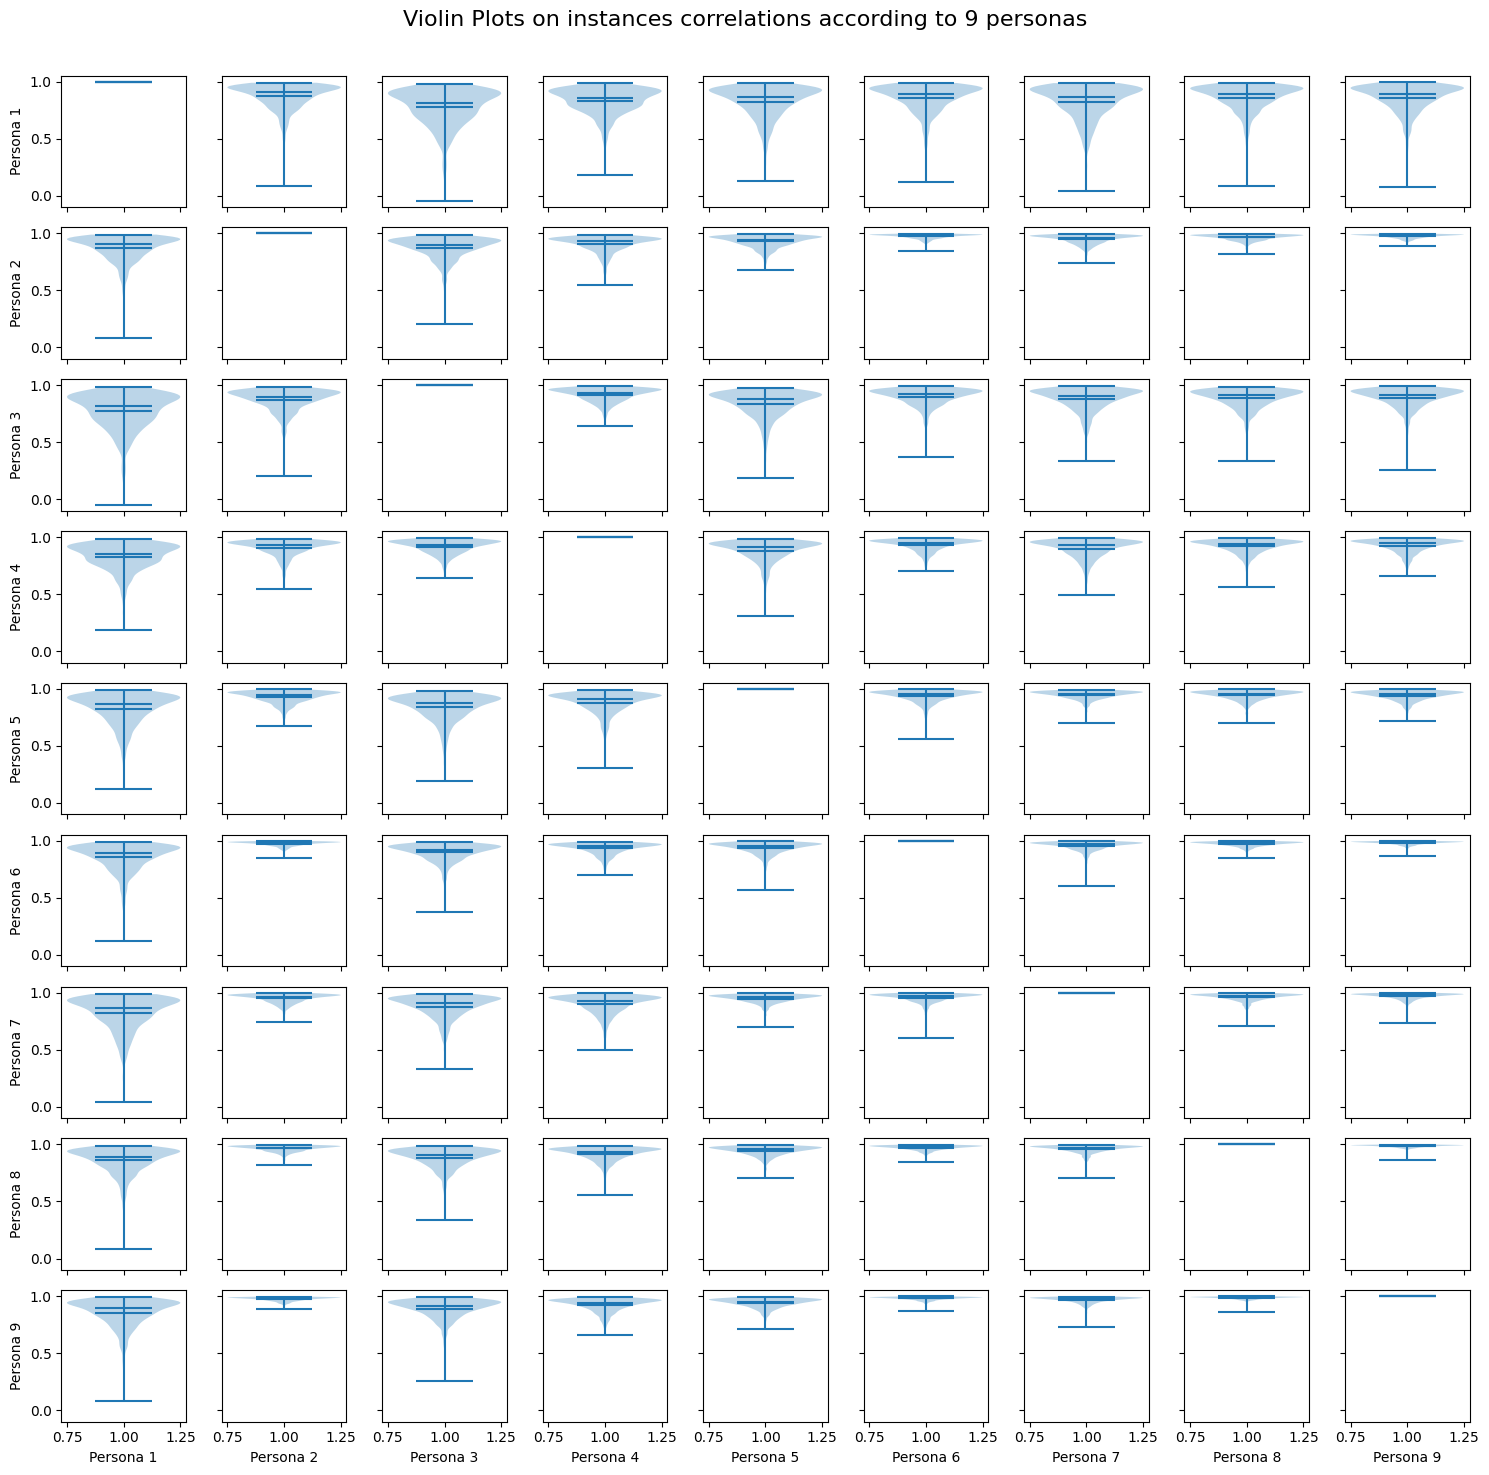

In [57]:
fig, axes = plt.subplots(len(personas), len(personas), figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle("Violin Plots on instances correlations according to 9 personas", fontsize=16)

for i in range(len(personas)):
    for j in range(len(personas)):
        ax = axes[i, j]
        ax.violinplot(corr_per_instance[i, j, :], showmeans=True, showmedians=True)
        if i == len(personas) - 1:
            ax.set_xlabel(f"Persona {j+1}")
        if j == 0:
            ax.set_ylabel(f"Persona {i+1}")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Train a logistic regression to see if values changes. (Germeval)
- why ? Because there is not random initializations and is fast to train :)

In [13]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
import pickle
import numpy as np
import pandas as pd

train_file_name = '../germeval/train.csv'
test_file_name = '../germeval/test.csv'

def get_mapping(data_transformation, persona):
     
	mapping_train = {data_transformation['train'][persona]['id'][i]:np.array(data_transformation['train'][persona]['values'][i]) for i in range(len(data_transformation['train'][persona]['id']))}
	mapping_test = {data_transformation['test'][persona]['id'][i]:np.array(data_transformation['test'][persona]['values'][i]) for i in range(len(data_transformation['test'][persona]['id']))}
	return mapping_train, mapping_test

def evaluate(model, X_test, y_test):

    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average='macro')

data_transformation = {}
with open(f'../germeval/diferent_persona_vectors_train.pickle', 'rb') as handle:
	data_transformation['train'] = pickle.load(handle)
with open(f'../germeval/diferent_persona_vectors_test.pickle', 'rb') as handle:
	data_transformation['test'] = pickle.load(handle)	
      

df_test = pd.read_csv(test_file_name, sep=',')
df_train = pd.read_csv(train_file_name, sep=',')



mean_performance_personas_germeval = {'train':[],
						'test':[]}

for persona in range(9):

	feature_vectors_train = []
	labels_train = []

	feature_vectors_test = []
	labels_test = []

	mapping_train, mapping_test = get_mapping(data_transformation, persona)

	for _, row in df_train.iterrows():
		feature_vectors_train += [mapping_train[row['id']]]
		labels_train += [row['Class']]


	for _, row in df_test.iterrows():
		feature_vectors_test += [mapping_test[row['id']]]
		labels_test += [row['Class']]


	feature_vectors_train = np.array(feature_vectors_train)
	feature_vectors_test = np.array(feature_vectors_test)
	labels_train = np.array(labels_train)
	labels_test = np.array(labels_test)


	clf = LogisticRegression()
	clf.fit(feature_vectors_train, labels_train)
	mean_performance_personas_germeval['train'] += [evaluate(clf, feature_vectors_train, labels_train)]
	mean_performance_personas_germeval['test'] += [evaluate(clf, feature_vectors_test, labels_test)]

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

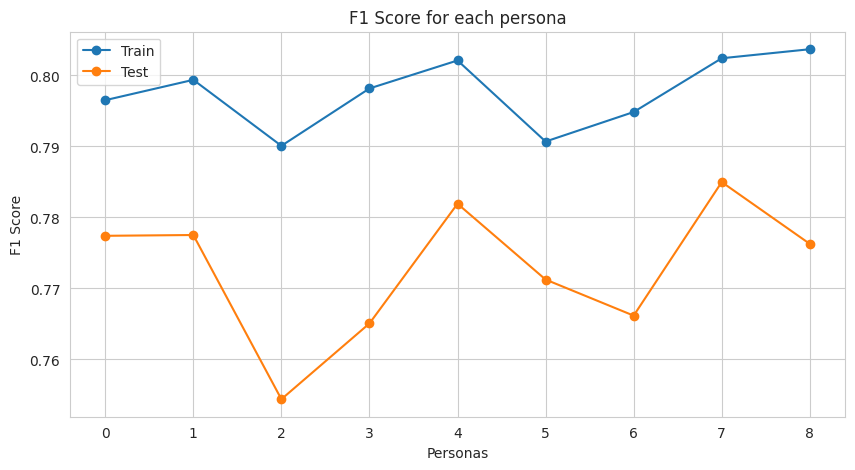

In [14]:
# plot values for train and test
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.plot(range(9), mean_performance_personas_germeval['train'], label='Train', marker='o')
plt.plot(range(9), mean_performance_personas_germeval['test'], label='Test', marker='o')
plt.legend()
plt.xlabel('Personas')
plt.ylabel('F1 Score')
# plt.ylim(0, 1)
plt.title('F1 Score for each persona')

plt.show()

In [ ]:
0["You are an expert in social psychology. When you are asked a question, you prefer to give short, concrete answers.",
1"You are an expert in social psychology.",
2"",
3"You are a Linguist.",
4"You are a content moderator.",
5"You are a psychologist.",
6"You are a social media expert.",
7"You are a political scientist.",
8"You are a sociologist.",]

## Train a logistic regression to see if values changes. (TSNH)

In [5]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
import pickle
import numpy as np
import pandas as pd

file_name = '../tsnh/TSNH_uniform.csv'

def get_mapping(data_transformation, persona):
     
	mapping_train = {data_transformation[persona]['id'][i]:np.array(data_transformation[persona]['values'][i]) for i in range(len(data_transformation[persona]['id']))}
	return mapping_train

def evaluate(model, X_test, y_test):

    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average='macro')

with open(f'../tsnh/diferent_persona_vectorstrain.csv.pickle', 'rb') as handle:
	data_transformation = pickle.load(handle)	

df_train = pd.read_csv(file_name, sep=',')
df_train = df_train.dropna()


performance_personas = {'train':np.zeros((9, 5)),
						'test':np.zeros((9, 5))}

skf = StratifiedKFold(n_splits=5, shuffle=True)

for i, (train_index, test_index) in enumerate(skf.split(np.arange(len(df_train)), df_train['Class'].values)):

	for persona in range(9):

		feature_vectors = []
		labels = []

		mapping_train = get_mapping(data_transformation, persona)
		mal = 0 
		for _, row in df_train.iterrows():
			feature_vectors += [mapping_train[row['id']]]
			labels += [row['Class']]
		
		feature_vectors = np.array(feature_vectors)
		labels = np.array(labels)

		clf = LogisticRegression()
		clf.fit(feature_vectors[train_index], labels[train_index])
		performance_personas['train'][persona, i] = evaluate(clf, feature_vectors[train_index], labels[train_index])
		performance_personas['test'][persona, i] = evaluate(clf, feature_vectors[test_index], labels[test_index])

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [6]:
mean_performance_personas_tsnh = {'train':np.mean(performance_personas['train'], axis=1),
						'test':np.mean(performance_personas['test'], axis=1)}
std_performance_personas_tsnh = {'train':np.std(performance_personas['train'], axis=1),
						'test':np.std(performance_personas['test'], axis=1)}


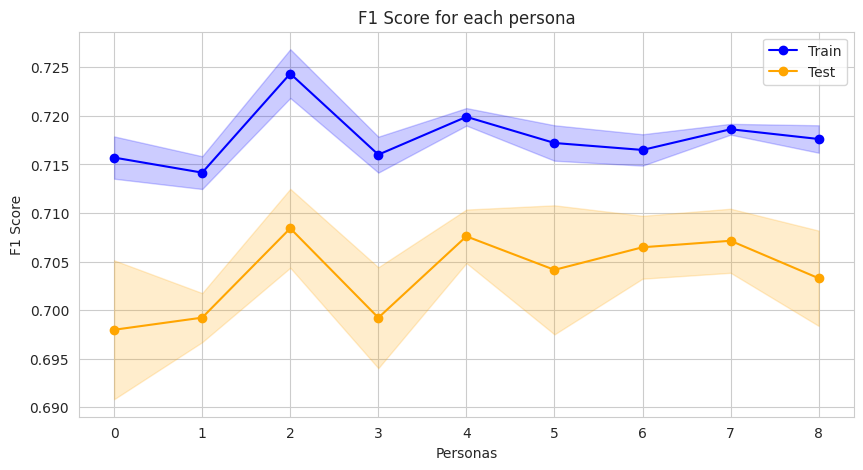

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming mean_performance_personas and std_performance_personas are predefined
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))

x = range(9)  # Replace with appropriate x values if different

# Train plot with shaded std area
plt.plot(x, mean_performance_personas_tsnh['train'], label='Train', marker='o', color='blue')
plt.fill_between(x,
                 mean_performance_personas_tsnh['train'] - std_performance_personas_tsnh['train'],
                 mean_performance_personas_tsnh['train'] + std_performance_personas_tsnh['train'],
                 alpha=0.2, color='blue')

# Test plot with shaded std area
plt.plot(x, mean_performance_personas_tsnh['test'], label='Test', marker='o', color='orange')
plt.fill_between(x,
                 mean_performance_personas_tsnh['test'] - std_performance_personas_tsnh['test'],
                 mean_performance_personas_tsnh['test'] + std_performance_personas_tsnh['test'],
                 alpha=0.2, color='orange')


# plt.ylim(0, 1)
plt.legend()
plt.xlabel('Personas')
plt.ylabel('F1 Score')
plt.title('F1 Score for each persona')
plt.show()

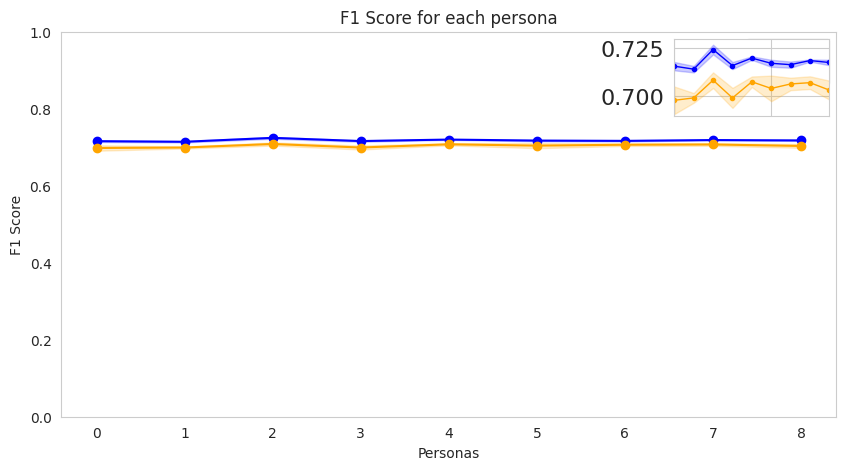

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Main plot
sns.set_style('whitegrid')  # Apply global styling
fig, ax = plt.subplots(figsize=(10, 5))

x = range(9)  # Replace with appropriate x values if different

# Train plot with shaded std area
ax.plot(x, mean_performance_personas_tsnh['train'], label='Train', marker='o', color='blue')
ax.fill_between(x,
                mean_performance_personas_tsnh['train'] - std_performance_personas_tsnh['train'],
                mean_performance_personas_tsnh['train'] + std_performance_personas_tsnh['train'],
                alpha=0.2, color='blue')

# Test plot with shaded std area
ax.plot(x, mean_performance_personas_tsnh['test'], label='Test', marker='o', color='orange')
ax.fill_between(x,
                mean_performance_personas_tsnh['test'] - std_performance_personas_tsnh['test'],
                mean_performance_personas_tsnh['test'] + std_performance_personas_tsnh['test'],
                alpha=0.2, color='orange')

# Disable grid in the main plot
ax.grid(False)

ax.set_ylim(0, 1)
ax.set_xlabel('Personas')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score for each persona')
ax.legend()

# Zoomed-in inset
axins = inset_axes(ax, width="20%", height="20%", loc="upper right")  # Adjust size and position
axins.plot(x, mean_performance_personas_tsnh['train'], label='Train', marker='o', color='blue',
           linewidth=1, markersize=3)  # Smaller markers for inset
axins.fill_between(x,
                   mean_performance_personas_tsnh['train'] - std_performance_personas_tsnh['train'],
                   mean_performance_personas_tsnh['train'] + std_performance_personas_tsnh['train'],
                   alpha=0.2, color='blue')
axins.plot(x, mean_performance_personas_tsnh['test'], label='Test', marker='o', color='orange', 
           linewidth=1, markersize=3)  # Smaller markers for inset
axins.fill_between(x,
                   mean_performance_personas_tsnh['test'] - std_performance_personas_tsnh['test'],
                   mean_performance_personas_tsnh['test'] + std_performance_personas_tsnh['test'],
                   alpha=0.2, color='orange')

# Set limits for zoomed area
axins.set_ylim(0.69, 0.73)  # Adjust y-axis limits for inset
axins.set_xlim(min(x), max(x))  # Adjust x-axis if needed
axins.tick_params(labelsize=16)  # Smaller ticks for inset
axins.tick_params(labelsize=16)  # Smaller ticks for inset
axins.set_xticklabels([])  # Ensure x-ticks are displayed

# Enable grid in the inset plot
axins.grid(True)

plt.show()

/tmp/ipykernel_1485245/3201907866.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


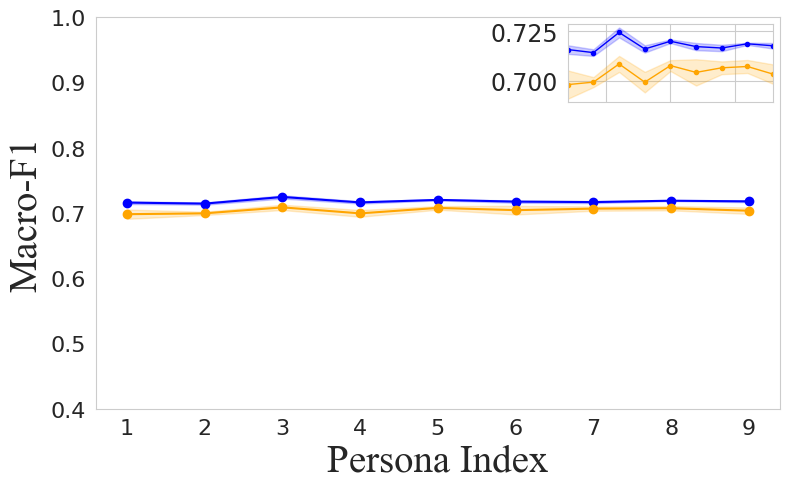

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib.font_manager as fm
font_path = './Times New Roman.ttf'  # Update with correct path
times_new_roman = fm.FontProperties(fname=font_path)

# Plot TSNH and Germeval side by side
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

x = np.arange(1, 10)

# TSNH plot
ax = axes#[0]
ax.plot(x, mean_performance_personas_tsnh['train'], label='Train', marker='o', color='blue')
ax.fill_between(x,
                mean_performance_personas_tsnh['train'] - std_performance_personas_tsnh['train'],
                mean_performance_personas_tsnh['train'] + std_performance_personas_tsnh['train'],
                alpha=0.2, color='blue')
ax.plot(x, mean_performance_personas_tsnh['test'], label='Test', marker='o', color='orange')
ax.fill_between(x,
                mean_performance_personas_tsnh['test'] - std_performance_personas_tsnh['test'],
                mean_performance_personas_tsnh['test'] + std_performance_personas_tsnh['test'],
                alpha=0.2, color='orange')
ax.set_ylim(0.4, 1)
ax.set_xlabel('Persona Index', fontsize=28, fontproperties=times_new_roman)
ax.set_ylabel('Macro-F1', fontsize=28, fontproperties=times_new_roman)
# ax.legend()
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.grid(False)

ax.set_xticks(x)
ax.set_xticklabels(x, fontsize=16)

ax.tick_params(axis='y', labelsize=16)
ax.grid(False)

# Zoomed-in inset for TSNH
axins = inset_axes(ax, width="30%", height="20%", loc="upper right")
axins.plot(x, mean_performance_personas_tsnh['train'], label='Train', marker='o', color='blue', linewidth=1, markersize=3)
axins.fill_between(x,
                   mean_performance_personas_tsnh['train'] - std_performance_personas_tsnh['train'],
                   mean_performance_personas_tsnh['train'] + std_performance_personas_tsnh['train'],
                   alpha=0.2, color='blue')
axins.plot(x, mean_performance_personas_tsnh['test'], label='Test', marker='o', color='orange', linewidth=1, markersize=3)
axins.fill_between(x,
                   mean_performance_personas_tsnh['test'] - std_performance_personas_tsnh['test'],
                   mean_performance_personas_tsnh['test'] + std_performance_personas_tsnh['test'],
                   alpha=0.2, color='orange')
axins.set_ylim(auto=True)
axins.set_xlim(min(x), max(x))
axins.tick_params(labelsize=17)
axins.grid(True)
axins.set_xticklabels([]) 

# Germeval plot
# ax = axes#[1]
# ax.plot(x, mean_performance_personas_germeval['train'], label='Train', marker='o', color='blue')
# ax.plot(x, mean_performance_personas_germeval['test'], label='Test', marker='o', color='orange')

# ax.set_ylim(0, 1.1)
# ax.set_xlabel('Persona Index', fontsize=28, fontproperties=times_new_roman)
# ax.set_ylabel('Macro-F1', fontsize=28, fontproperties=times_new_roman)
# ax.legend(loc='lower right')
# ax.tick_params(axis='y', labelsize=16)
# ax.tick_params(axis='x', labelsize=16)
# ax.grid(False)

# # Zoomed-in inset for Germeval
# axins = inset_axes(ax, width="30%", height="20%", loc="upper right")
# axins.plot(x, mean_performance_personas_germeval['train'], label='Train', marker='o', color='blue', linewidth=1, markersize=3)
# axins.plot(x, mean_performance_personas_germeval['test'], label='Test', marker='o', color='orange', linewidth=1, markersize=3)
# axins.set_ylim(auto=True)
# axins.set_xlim(min(x), max(x))
# axins.tick_params(labelsize=17)
# axins.grid(True)
# axins.set_xticklabels([]) 

plt.tight_layout()
plt.savefig('f1_scores_prompt_tsnh.pdf', dpi=600, format='pdf')

plt.show()

In [41]:

with open(f'../tsnh/diferent_persona_vectorstrain.csv.pickle', 'rb') as handle:
	data_transformation = pickle.load(handle)	


In [47]:
values_per_instance = np.array([np.array(data_transformation[i]['values']) for i in range(len(data_transformation))])
values_per_instance = values_per_instance[:, np.random.choice(values_per_instance.shape[1], 1000, replace=False)]


personas = ["You are an expert in social psychology. When you are asked a question, you prefer to give short, concrete answers.",
"You are an expert in social psychology.",
"",
"You are a Linguist.",
"You are a content moderator.",
"You are a psychologist.",
"You are a social media expert.",
"You are a political scientist.",
"You are a sociologist.",]

print(values_per_instance.shape)

(9, 13923, 244)


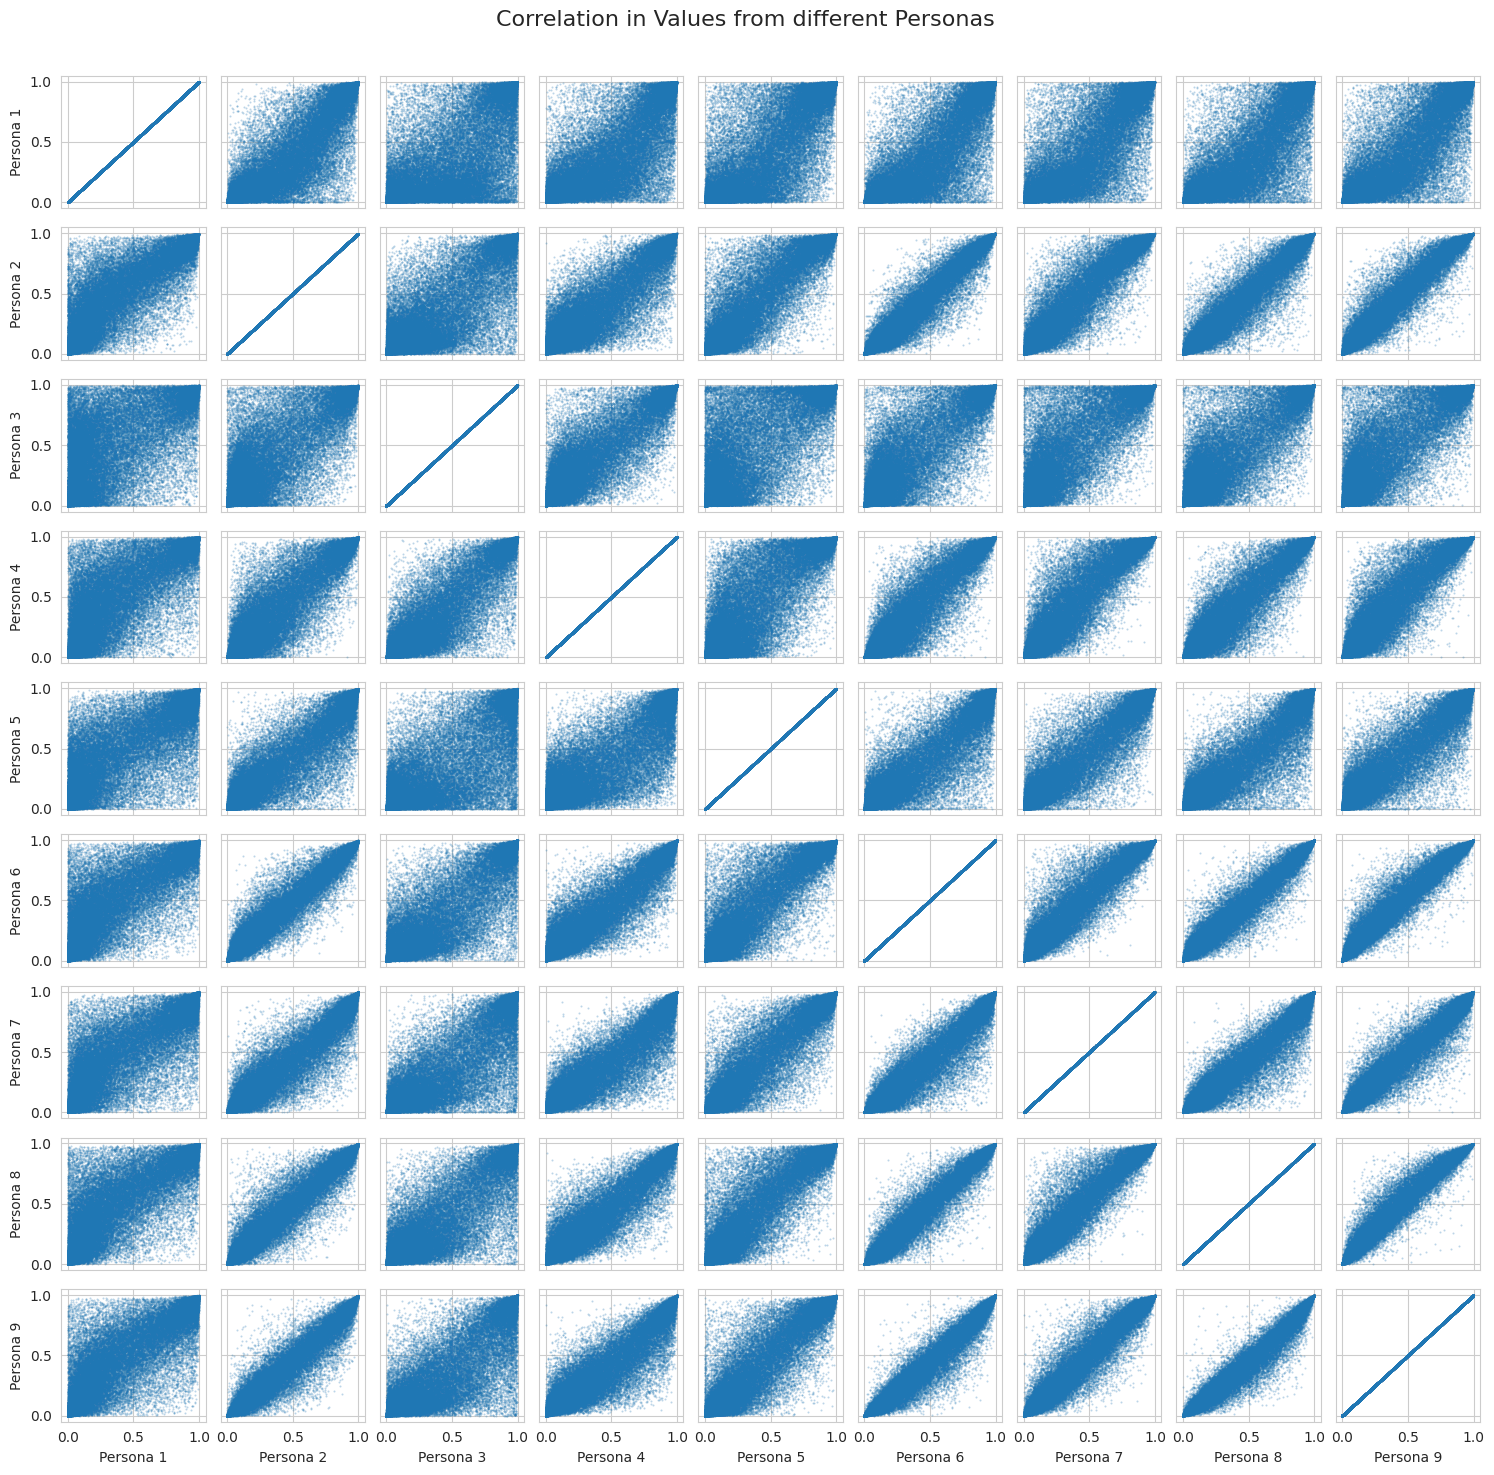

In [45]:
#scatter plot

### for each pair of personas plot a scatter using the sample tensor, len(sample) = len(personas)
nsample = values_per_instance[:, np.random.choice(values_per_instance.shape[1], 200, replace=False)]
nsample = nsample.reshape(nsample.shape[0], -1)

fig, axes = plt.subplots(len(personas), len(personas), figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle("Correlation in Values from different Personas", fontsize=16)

for i in range(len(personas)):
    for j in range(len(personas)):
        ax = axes[i, j]
        ax.scatter(nsample[i], nsample[j], alpha=0.3, linewidths=0.01, s=2)
        if i == len(personas) - 1:
            ax.set_xlabel(f"Persona {j+1}")
        if j == 0:
            ax.set_ylabel(f"Persona {i+1}")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Spearman correlation between LLM1 and LLM2: 0.854, p-value: 0.000
Spearman correlation between LLM1 and LLM3: 0.709, p-value: 0.000
Spearman correlation between LLM1 and LLM4: 0.800, p-value: 0.000
Spearman correlation between LLM1 and LLM5: 0.822, p-value: 0.000
Spearman correlation between LLM1 and LLM6: 0.837, p-value: 0.000
Spearman correlation between LLM1 and LLM7: 0.837, p-value: 0.000
Spearman correlation between LLM1 and LLM8: 0.838, p-value: 0.000
Spearman correlation between LLM1 and LLM9: 0.852, p-value: 0.000
Spearman correlation between LLM2 and LLM3: 0.835, p-value: 0.000
Spearman correlation between LLM2 and LLM4: 0.913, p-value: 0.000
Spearman correlation between LLM2 and LLM5: 0.909, p-value: 0.000
Spearman correlation between LLM2 and LLM6: 0.970, p-value: 0.000
Spearman correlation between LLM2 and LLM7: 0.944, p-value: 0.000
Spearman correlation between LLM2 and LLM8: 0.962, p-value: 0.000
Spearman correlation between LLM2 and LLM9: 0.968, p-value: 0.000
Spearman c

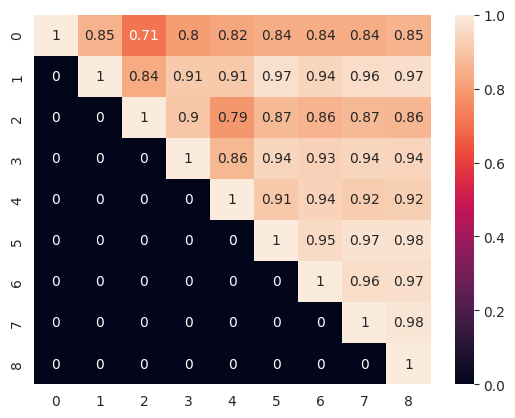

In [48]:
from itertools import combinations
# from scipy.stats import spearmanr
from scipy.stats import pearsonr
import seaborn as sns

sample = values_per_instance.reshape(len(personas), -1)
pairs = list(combinations(range(len(sample)), 2))
corr_values = np.zeros((len(sample), len(sample)))
# Perform pairwise Spearman tests
ps = np.zeros((len(sample), len(sample)))
for i, j in pairs:
    corr, p = pearsonr(sample[i], sample[j])
    corr_values[i][j] = corr
    ps[i][j] = p
    print(f"Spearman correlation between LLM{i+1} and LLM{j+1}: {corr:.3f}, p-value: {p:.3f}")


sns.heatmap(corr_values + np.identity(len(corr_values)), annot=True)
print(ps.max(), ps.min())

In [9]:
z = "0.648 & 0 & ~ & ~ & 0.553 & 0 & ~ & ~ & 0.426 & 0 & ~ & ~ & 0.364 & 0 & ~ & ~ & 0.696 & 0.007  "
z = z.replace('~', '100000').split("&")
out = ""
for i in range(0, len(z), 2):
	out += f"${{{float(z[i]):.3f}}}_{{{float(z[i+1]):.3f}}}$ & "

In [10]:
out

'${0.648}_{0.000}$ & ${100000.000}_{100000.000}$ & ${0.553}_{0.000}$ & ${100000.000}_{100000.000}$ & ${0.426}_{0.000}$ & ${100000.000}_{100000.000}$ & ${0.364}_{0.000}$ & ${100000.000}_{100000.000}$ & ${0.696}_{0.007}$ & '